# 시계열 데이터

## 12-1 datetime 오브젝트

In [116]:
from datetime import datetime

In [117]:
# 현재 시간 출력하기
now1 = datetime.now()
print(now1)
now2 = datetime.today()
print(now2)

2021-01-04 23:23:24.942957
2021-01-04 23:23:24.943053


In [118]:
# 시간을 직접 입력하여 인자로 전달하기
t1 = datetime.now()
t2 = datetime(1970,1,1)
t3 = datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2021-01-04 23:23:25.012963
1970-01-01 00:00:00
1970-12-12 13:24:34


In [119]:
# datetime은 시간 계산을 할 수 있다.
diff1 = t1 - t2
print(diff1)
print(type(diff1))

18631 days, 23:23:25.012963
<class 'datetime.timedelta'>


### datetime 오브젝트로 변환하기 - to_datetime 메서드

In [120]:
import pandas as pd
import os

In [122]:
# to_datetime 메서드를 사용하여 datetime으로 변환
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [123]:
# dt 연산자 사용
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


### 시간 형식 지정자
- %a : 요일 출력 (Sun...)
- %A : 요일 출력 (Sunday...)
- %w : 요일 출력 (숫자, 0부터 일요일)
- %d : 날짜 출력 (01,02,...)
- %b : 월 출력  (Jan, Feb, ...)
- %B : 월 출력  (January, February)
- %m : 월 출력  (01,02,.. 12)
- %y : 년 출력  (00,01,..99)
- %Y : 년 출력  (0001, 0002, ... 2020 ...)
- %H : 시간 출력 (00, 01, .. 23)
- %l : 시간 출력 (00, 01, .. 12)
- %p : AM 또는 PM 출력 
- %M : 분 출력  (00, 01, ... 59)
- %S : 초 출력  (00, 01, ... 59)
- %Z : 기준 지역 이름 출력 (UTC, EST, ...)
- %j : 올해의 지난 일 수 출력 (001, 002, 366)
- %U : 올해의 지난 주 수 출력 (00, 01, ... 53)
- %c : 날짜와 시간 출력 (Tue Aug 16 21:30:00 1988)
- %x : 날짜 출력 (08/16/88 )






In [124]:
# 시계열 데이터 구분해서 추출하기
now = datetime.now()
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2021-01-04


### datetime 오브젝트로 변환하기 -read_csv 메서드
- parse_dates=['Date']

In [125]:
ebola1 = pd.read_csv('data/country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [126]:
# 날짜 정보 추출하기
date_series = pd.Series(['2020-08-15','2018-05-17','2018-05-15'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2020-08-15
1   2018-05-17
2   2018-05-15
dtype: datetime64[ns]


In [127]:
print(d1[0].year)
print(d1[1].month)
print(d1[2].day)

2020
5
15


## 12-2 시계열 데이터 계산하기

### 1. 파산한 은행의 개수 계산하기

In [128]:
# 5열과 6열을 datetime형으로 변환
banks = pd.read_csv('data/banklist.csv', parse_dates=[5,6])
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank   2017-12-15   2017-12-20  
1                          Conway Bank   2017-10-13   2017-10-20  
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26  
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26  
4                         Whitney Bank   2017-04-28   2017-12-05  


In [129]:
# dt 접근자와 quarter 속성을 이용하여 은행이 파산한 분기 알아보기
# .dt.quarter : 분기 확인 (1,2,..4)
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

In [130]:
# 연도별 파산한 은행 파악
closing_year = banks.groupby('closing_year').size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [131]:
# 각 연도별, 분기별로 파산한 은행의 개수 파악
closing_year_q = banks.groupby(['closing_year','closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

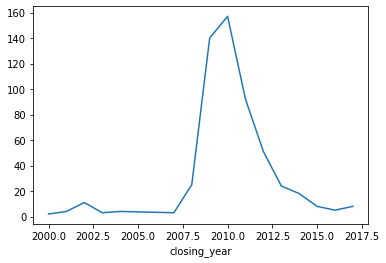

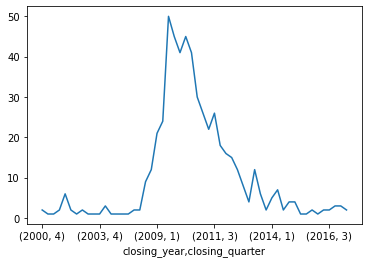

In [132]:
# 분석한 데이터로 그래프 그리기
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

### 2. 테슬라 주식 데이터로 시간 계산하기

In [133]:
# pandas-datereader 라이브러리로 주식 데이터 불러오기
# !pip3 install pandas-datareader

In [134]:
# 테슬라의 주식 데이터 내려받은 다음 to_csv 메서드를 사용하여 데이터 넣기
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

# tesla에는 데이터 프레임이 저장 (에러 발생)
# www.quamdl.com에서 key 입력받기
tesla = pdr.get_data_quandl('TSLA', api_key ='kd5vsnsudkxEiRkcaYjT')

# tesla에 저장된 데이터프레임을 파일로 저장
tesla.to_csv('data/tesla_stock_quandl.csv')

### 시간 범위와 인덱스

In [135]:
# 시간범위 생성해 인덱스로 지정하기
ebola = pd.read_csv('data/country_timeseries.csv', parse_dates=[0])
print(ebola.iloc[:5,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [136]:
# 시간 인덱스 생성
head_range = pd.date_range(start = '2014-12-31', end = '2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [137]:
ebola_1 = ebola.head()
ebola_1.index = ebola_1['Date'] # 'Date'열을 인덱스로 지정
ebola_1.reindex(head_range) # 인덱스값 새로 지정
print(ebola_1.iloc[:5,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


### 시간 범위 수정하고 데이터 밀어내기 -shift 메서드

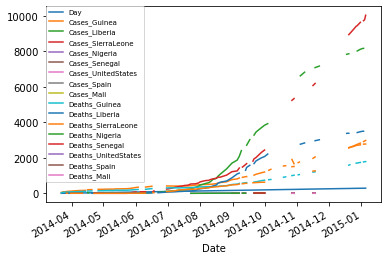

In [138]:
# 에볼라의 확산 속도 비교하기
ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.iloc[0:,1:].plot(ax=ax)
ax.legend(fontsize=7,loc=2, borderaxespad=0.)
plt.show()

In [139]:
# 발병일이 달라 그래프가 그려지기 시작한 지점도가 다름
# 처음 에볼라가 발병한 Guinea와 동일한 위치로 옮겨야 제대로된 비교 가능

ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


In [140]:
# 그래프를 그리기 위한 데이터프레임 준비하기
ebola = pd.read_csv('data/country_timeseries.csv', parse_dates=['Date'])
print(ebola1.head().iloc[:,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [141]:
# Date 열을 인덱스로 지정한 다음 ebloa 데이터프레임의 최댓값과 최솟값으로 시간범위 지정
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(),ebola.index.max())
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [142]:
# 시간의 순서를 맞추기 위해 reversed 메서드 사용
new_idx = reversed(new_idx)

In [143]:
# reindex를 사용하여 새로 생성한 인덱스를 새로운 인덱스로 지정
ebola = ebola.reindex(new_idx)
print(ebola.head().iloc[:,:5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [144]:
# 각 나라의 에볼라 발병일 구하기
# last_valid_index : 가장 오래된 데이터 가져오기
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [145]:
# 각 나라의 에볼라 발병일 구하기
# first_valid_index : 가장 최근 데이터 가져오기
last_valid = ebola.apply(pd.Series.first_valid_index)
print(last_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


In [146]:
# 발병일을 동일한 출발선으로 옮기기
# 가장 처음 발병한날에서 각 나라의 에볼라 발병일 빼기
earliest_date = ebola.index.min()
print(earliest_date)

shift_values = last_valid - earliest_date
print(shift_values)

2014-03-22 00:00:00
Date                  289 days
Day                   289 days
Cases_Guinea          289 days
Cases_Liberia         287 days
Cases_SierraLeone     289 days
Cases_Nigeria         260 days
Cases_Senegal         260 days
Cases_UnitedStates    260 days
Cases_Spain           260 days
Cases_Mali            260 days
Deaths_Guinea         289 days
Deaths_Liberia        287 days
Deaths_SierraLeone    289 days
Deaths_Nigeria        260 days
Deaths_Senegal        260 days
Deaths_UnitedStates   260 days
Deaths_Spain          260 days
Deaths_Mali           260 days
dtype: timedelta64[ns]


In [147]:
# 각 나라의 에볼라 발병일을 옮겨서 맞추기
# shift 메서드를 사용하여 데이터를 밀어내기
ebola_dict = {}

for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted

In [148]:
# 딕셔너리를 데이터 프레임으로 변환
ebola_shift = pd.DataFrame(ebola_dict)

In [149]:
print(ebola_shift.tail(1))

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                           
2014-03-22 2015-01-05  289.0        2776.0         8166.0            10030.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-22           20.0            1.0                 4.0          1.0   

            Cases_Mali  Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  \
Date                                                                        
2014-03-22         7.0         1786.0          3496.0              2977.0   

            Deaths_Nigeria  Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  \
Date                                                                            
2014-03-22             8.0             0.0                  1.0           0.0   

            Deaths_Mali  
Date                     

In [150]:
# 인덱스를 Day열로 지정하고 그래프에 필요없는 열 삭제
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date','Day'], axis=1)

In [152]:
print(ebola_shift.tail())

       Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                    
NaN             NaN            NaN                NaN            NaN   
NaN             NaN            NaN                NaN            NaN   
NaN             NaN            NaN                NaN            NaN   
NaN             NaN            NaN                NaN            NaN   
289.0        2776.0         8166.0            10030.0           20.0   

       Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                                 
NaN              NaN                 NaN          NaN         NaN   
NaN              NaN                 NaN          NaN         NaN   
NaN              NaN                 NaN          NaN         NaN   
NaN              NaN                 NaN          NaN         NaN   
289.0            1.0                 4.0          1.0         7.0   

       Deat

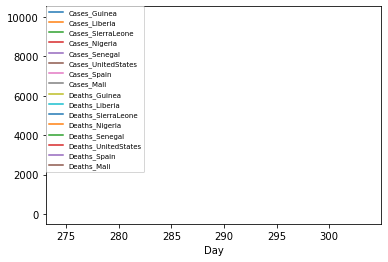

In [154]:
# 그래프로 표현

fig, ax = plt.subplots()
ax = ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7,loc=2, borderaxespad=0.)
plt.show()